# **PLQY_all**

_by Felix Eickemeyer_

Evaluation of selected data.

In [1]:
import os

import pandas as pd
import shutil
from thot import ThotProject

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [2]:
# Initializes Thot project
db = ThotProject(dev_root=r'PLQY_results')

In [4]:
samples = db.find_assets({'type': 'absolute PL spectrum'})
sample_strlen = int(max([len(samples[idx].name.split('_absolute')[0]) for idx in range(len(samples))]))
for idx, sample in enumerate(samples):
    A = sample.metadata["A"]
    PLQY = sample.metadata["PLQY"]
    s_name = samples[idx].name.split('_absolute')[0]
    print(f'{idx:2}: {s_name.ljust(sample_strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}')

 0: 1tbp                         : A = 7.9e-01, PLQY = 3.5e-02
 1: 2oai-tbp2                    : A = 7.9e-01, PLQY = 5.6e-03
 2: 2OAI-tbp                     : A = 8.0e-01, PLQY = 4.2e-03
 3: 2OAI                         : A = 8.0e-01, PLQY = 1.2e-03
 4: FaCs-OAI-2                   : A = 7.8e-01, PLQY = 7.0e-02
 5: FaCs-OAI-3                   : A = 7.8e-01, PLQY = 1.7e-01
 6: FaCs-OAI-Spiro with tbp Li2  : A = 8.7e-01, PLQY = 3.7e-02
 7: FaCs-OAI-Spiro with tbp Li   : A = 8.9e-01, PLQY = 1.4e-02
 8: FACs-OAI-spiro-tbp           : A = 8.7e-01, PLQY = 6.7e-01
 9: FaCs-OAI-Spiro2              : A = 8.2e-01, PLQY = 8.1e-03
10: FaCs-OAI-Spiro               : A = 8.3e-01, PLQY = 5.7e-03
11: FaCs-OAI-tbp                 : A = 7.8e-01, PLQY = 9.5e-02
12: FACs-spiro with tbp Li2      : A = 8.5e-01, PLQY = 1.1e-02
13: FaCs-Spiro with tbp Li       : A = 8.5e-01, PLQY = 1.2e-02
14: FaCs-Spiro with tbp only     : A = 8.3e-01, PLQY = 4.0e-01
15: FACs-Spiro with tbp2         : A = 8.4e-01, PLQY = 

# Select samples

In [5]:
samples = db.find_assets({'type': 'absolute PL spectrum'})

selection_type = 'without and with TPA'
selection = [0, 1, 5, 2, 3, 4]

samples = [samples[selection[idx]] for idx in range(len(selection))]
sa = []
for idx, sample in enumerate(samples):
    # sample.file = sample.file+'.csv' #only for Shuai samples, delete later
    sa.append(spc.PEL_spectrum.load(sample.file, take_quants_and_units_from_file=True))
    print(f'{idx:2}: {sample.name}')

 0: 1tbp_absolute PL spectrum.csv
 1: 2oai-tbp2_absolute PL spectrum.csv
 2: FaCs-OAI-3_absolute PL spectrum.csv
 3: 2OAI-tbp_absolute PL spectrum.csv
 4: 2OAI_absolute PL spectrum.csv
 5: FaCs-OAI-2_absolute PL spectrum.csv


1tbp       : A = 7.9e-01, PLQY = 3.5e-02, PF = 6.0e+19 1/(s m2)
2oai-tbp2  : A = 7.9e-01, PLQY = 5.6e-03, PF = 9.8e+18 1/(s m2)
FaCs-OAI-3 : A = 7.8e-01, PLQY = 1.7e-01, PF = 2.9e+20 1/(s m2)
2OAI-tbp   : A = 8.0e-01, PLQY = 4.2e-03, PF = 7.2e+18 1/(s m2)
2OAI       : A = 8.0e-01, PLQY = 1.2e-03, PF = 2.0e+18 1/(s m2)
FaCs-OAI-2 : A = 7.8e-01, PLQY = 7.0e-02, PF = 1.2e+20 1/(s m2)


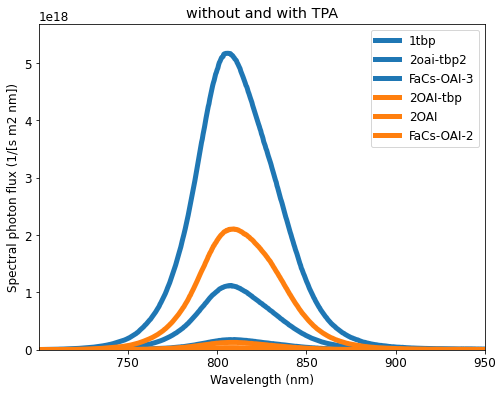

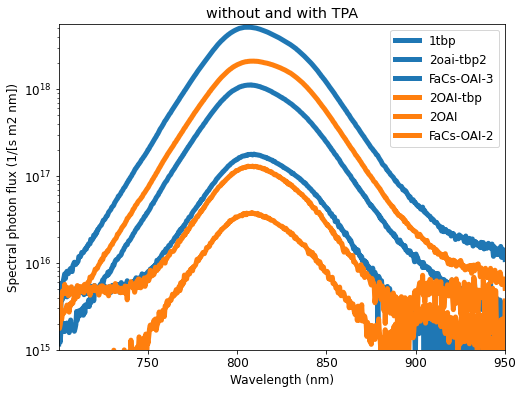

In [6]:
allPL = spc.PEL_spectra(sa)
allPL.names_to_label()

new_labels = []
strlen = int(max([len(samples[idx].name.split('_absolute')[0]) for idx in range(len(samples))]))

for idx in range(len(samples)):
    allPL.sa[idx].plotstyle = dict(color = gen.colors[idx], linewidth = 5, linestyle = '-')
    sm = samples[idx].metadata
    A = sm['A']
    PLQY = sm['PLQY']
    s_name = samples[idx].name.split('_absolute')[0]
    new_labels.append(s_name)
    PF = allPL.sa[idx].photonflux(start = 700, stop = 900)
    print(f'{s_name.ljust(strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}, PF = {PF:.1e} 1/(s m2)')

change_plotstyle = False
if change_plotstyle:
    allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[2].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[3].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[4].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[5].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    #allPL.sa[6].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[7].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[8].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[9].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[10].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[11].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[12].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    #allPL.sa[13].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    #allPL.sa[14].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    change_plotstyle = False
    
change_plotstyle = True
if change_plotstyle:
    for idx, sp in enumerate(allPL.sa):
        if idx < 3:
            sp.plotstyle = dict(color=gen.colors[0], linewidth=5, linestyle='-')
        elif idx < 12:
            sp.plotstyle = dict(color=gen.colors[1], linewidth=5, linestyle='-')
        elif idx < 18:
            sp.plotstyle = dict(color=gen.colors[2], linewidth=5, linestyle='-')
        else:
            sp.plotstyle = dict(color=gen.colors[3], linewidth=5, linestyle='-')
    change_plotstyle = False


# allPL.label(['s1', 's2', 's3', 's4', 's6'])
allPL.label(new_labels)
FN_lin = selection_type.replace(' ', '_') + '_linear.png'
all_graph = allPL.plot(bottom=0, plotstyle='individual', figsize=(8, 6),
                       return_fig=True, show_plot=False, title=selection_type)
lqy.add_graph(db, FN_lin, all_graph)

FN_log = selection_type.replace(' ', '_') + '_semilog.png'
all_graph_log = allPL.plot(yscale='log',
                           bottom=1e15,
                           divisor=1e3,
                           plotstyle='individual',
                           figsize=(8, 6),
                           return_fig=True,
                           show_plot=False,
                           title=selection_type)
lqy.add_graph(db, FN_log, all_graph_log)

# Save all data in exchange folder

In [ ]:
exch_dir = os.path.join(db.root, 'exchange')

# graph linear
filepath = os.path.join(exch_dir, FN_lin)
all_graph.savefig(filepath)

# graph semilog
filepath = os.path.join(exch_dir, FN_log)
all_graph_log.savefig(filepath)
